In [ ]:
#Code qui lance la webcam live
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    exit()

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Webcam Live", frame)

    # Quitter avec q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(100)

-1

In [ ]:
# fonction qui détecte les markers ArUco
def detect_aruco(frame):
    # Prépare le dictionnaire ArUco
    aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
    parameters = cv2.aruco.DetectorParameters()
    detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
    # Convertir en gris
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # detect markers
    corners, ids, rejected = detector.detectMarkers(gray)

    # copy for visualization
    vis = frame.copy()
    if ids is not None:
        cv2.aruco.drawDetectedMarkers(vis, corners, ids)
    return corners, ids, rejected, vis

IDs détectés : [[3]
 [4]
 [0]
 [1]
 [2]]


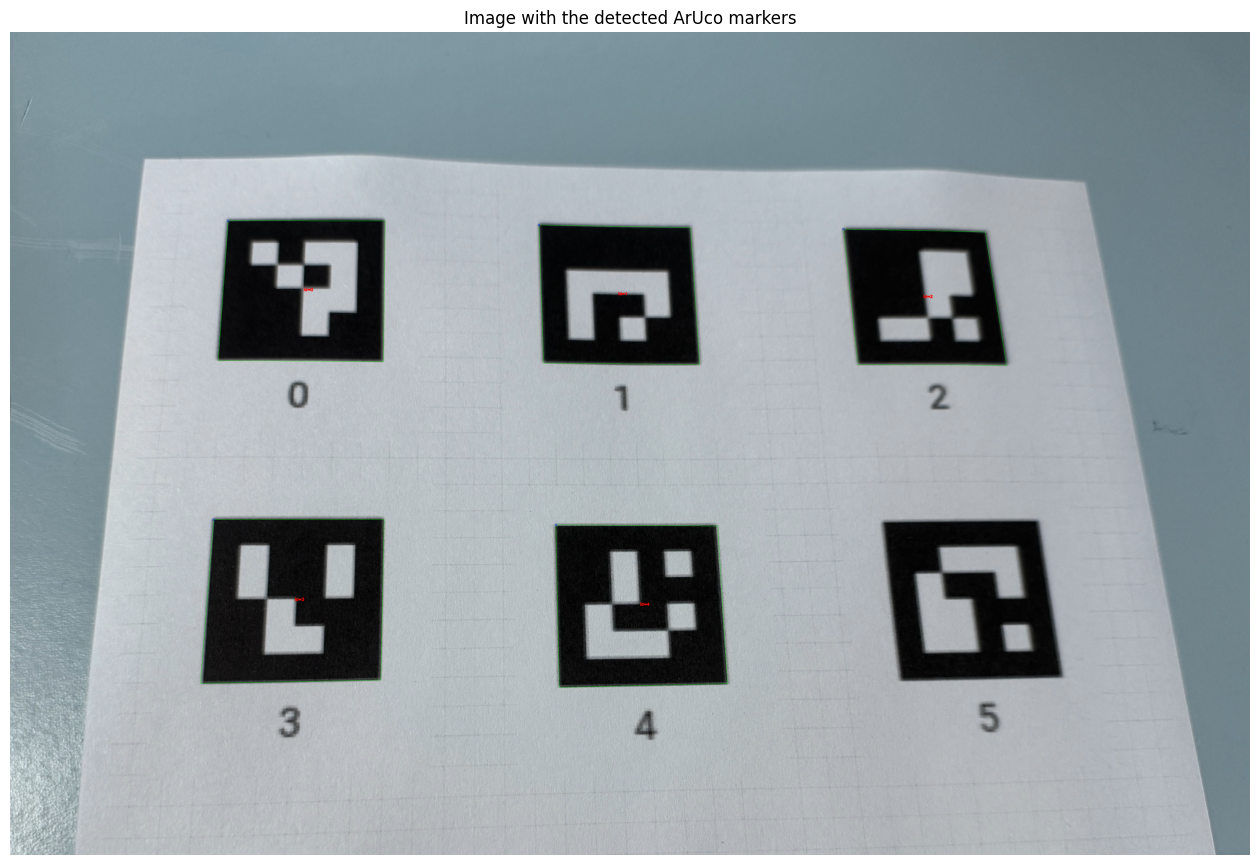

In [ ]:
# Code qui affiche la détection ArUco à partir d'un fichier jpg
image_path = 'markers.jpg'
image = cv2.imread(image_path)


# Détection ArUco
corners, ids, rejected, vis = detect_aruco(image)

# Afficher résultat
print("IDs détectés :", ids)

plt.figure(figsize=(16, 12))
plt.imshow(vis, cmap='hsv') # Important: utiliser cmap='gray' pour les images N&B
plt.title("Image with the detected ArUco markers")
plt.axis('off') # Cache les axes x et y
plt.show() # Affiche la fenêtre Matplotlib


In [21]:
# Code qui affiche la détection ArUco en live via la webcam
import cv2
import numpy as np

# Ouvre la webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erreur : impossible d'ouvrir la webcam")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Détecter les marqueurs
    corners, ids, rejected, vis = detect_aruco(frame)

    # Afficher la frame en live
    cv2.imshow("Webcam - ArUco Detection Live", vis)

    # Quitter avec 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(100)


-1

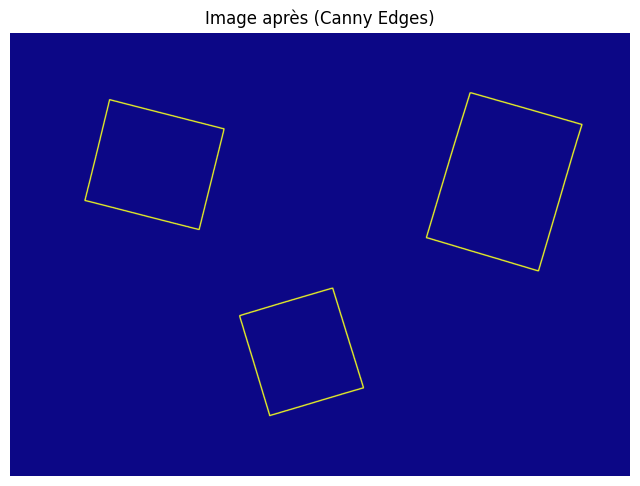

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    """Convertit l'image en niveaux de gris, applique un flou et une détection de contours."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edges = cv2.Canny(blurred, 90, 200, 7, L2gradient=True)
    return edges

# --- Utilisation ---

image_path = 'obstacles.jpg' # Remplacez par le chemin de votre image
image = cv2.imread(image_path)

edges = preprocess_image(image)
dilated_edges = cv2.dilate(edges, kernel=np.ones((5, 5), np.uint8), iterations=1)

plt.figure(figsize=(8, 6))
plt.imshow(dilated_edges, cmap='plasma') 
plt.title("Image après (Canny Edges)")
plt.axis('off') # Cache les axes x et y
plt.show() # Affiche la fenêtre Matplotlib


Liste des vertices :
[array([[1526, 1005],
       [ 892, 1191],
       [1096, 1870],
       [1733, 1683]], dtype=int32), array([[ 344,  155],
       [ 178,  839],
       [ 955, 1036],
       [1123,  352]], dtype=int32), array([[1992,   71],
       [1697, 1053],
       [2459, 1277],
       [2753,  284]], dtype=int32)]


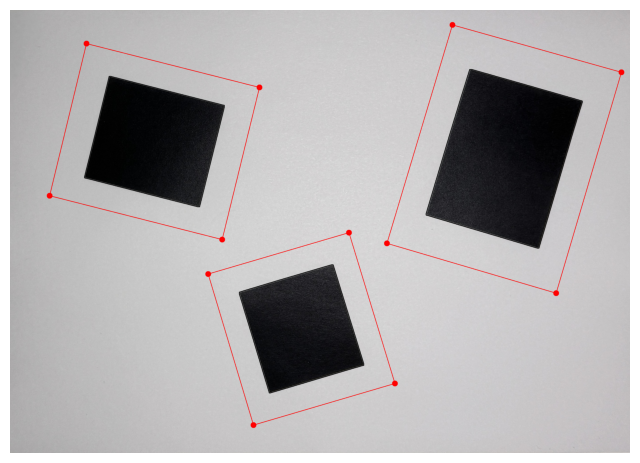

In [6]:
def scale_contour(contour, scale):
    M = cv2.moments(contour)
    if M['m00'] == 0:
        return contour
    
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    center = np.array([cx, cy])
    
    scaled = (contour - center) * scale + center
    return scaled.astype(np.int32)


# --- Utilisation ---

contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

scaled_contours = []
all_vertices = []
output = image.copy()
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    scaled = scale_contour(approx, scale=1.5)
    scaled_contours.append(scaled)

    vertices = scaled.reshape(-1, 2)   # (4,2)
    all_vertices.append(vertices)
    for (x, y) in vertices:
        cv2.circle(output, (x, y), 13, (0, 0, 255), -1)


cv2.drawContours(output, contours, -1, (0, 0, 0), 2)
cv2.drawContours(output, scaled_contours, -1, (0, 0, 255), 2)

print("Liste des vertices :")
print(all_vertices)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
